<a href="https://colab.research.google.com/github/tejask0512/Implementation-of-PCA-with-ANN-algorithm-for-Face-recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project Name: Implementation of PCA with ANN algorithm for Face recognition

## Name:Tejas Kamble

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import models, layers
import scipy
import matplotlib.pyplot as plt
import os,cv2

In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=256


In [ ]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\tejas\Internship studio\Project\dataset\faces",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE
)

Found 450 files belonging to 9 classes.


In [ ]:
Actor_names=dataset.class_names
Actor_names

['Aamir',
 'Ajay',
 'Akshay',
 'Alia',
 'Amitabh',
 'Deepika',
 'Disha',
 'Farhan',
 'Ileana']

(32, 256, 256, 3)
[7 1 2 1 2 3 5 7 3 5 2 0 7 0 3 6 3 0 8 1 0 7 7 4 6 1 2 3 7 4 6 1]
(32, 256, 256, 3)
[4 8 3 5 6 5 4 6 5 7 7 8 1 5 2 8 8 4 2 5 6 6 6 6 0 8 4 1 1 2 8 0]


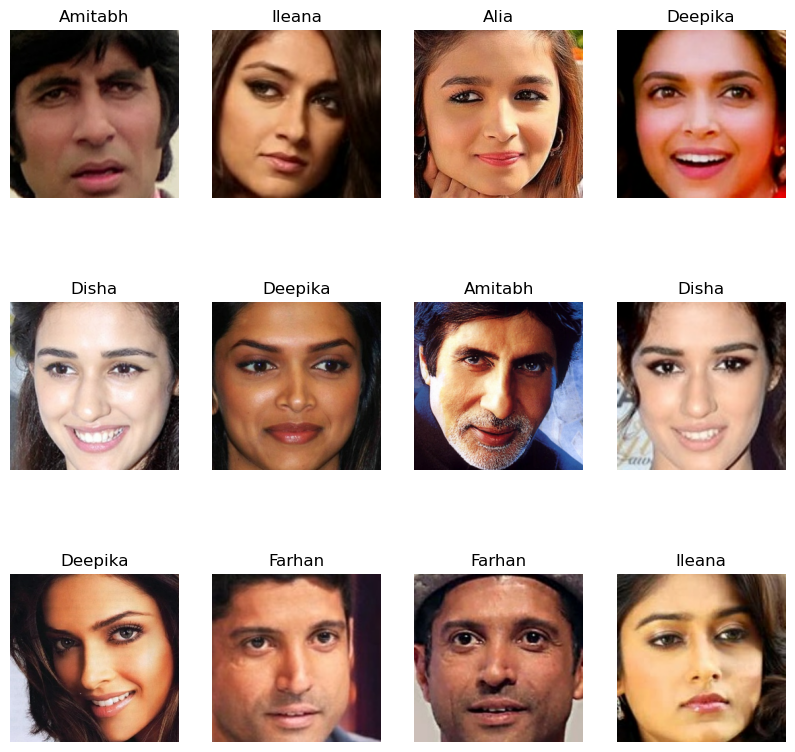

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(2):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(Actor_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(2*n_col,2.6* n_row))
    plt.subplots_adjust(bottom=0,left=.01, right=.90,top=.90 , hspace=.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row,n_col,i+1)
        plt.imshow(images[i].reshape(h,w),cmap=plt.cm.gray)
        plt.title(titles[i],size=12)
        plt.xticks(())
        plt.yticks(())

In [ ]:
face_data="dataset/faces/"
y=[];X=[];target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]

for person_name in os.listdir(face_data):
    actor_path=face_data+person_name+"/"
    class_names.append(person_name)

    for image_name in os.listdir(actor_path):
        image_path=actor_path+image_name
        img=cv2.imread(image_path)
        gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image=cv2.resize(gray, (h,w))
        v=resized_image.flatten()
        X.append(v)
        n_samples=n_samples+i
        y.append(person_id)
        target_names.append(person_name)

    person_id=person_id+1

y=np.array(y)
X=np.array(X)
target_names=np.array(target_names)
n_features=X.shape[1]
print(y.shape,X.shape,target_names.shape)
print("Number of samples: ",n_samples)

n_classes=target_names.shape[0]
print("Total_dataset_size:")
print("n_samples:", n_samples)
print("n_features",n_features)
print("n_classes:", n_classes)

(450,) (450, 90000) (450,)
Number of samples:  4950
Total_dataset_size:
n_samples: 4950
n_features 90000
n_classes: 450


Extracting the top 150 components from 337 faces


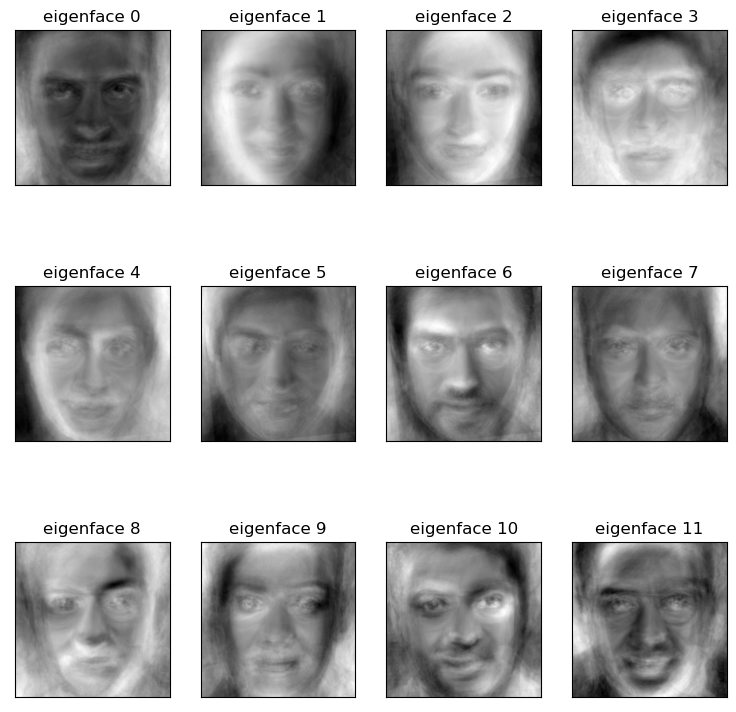

Projecting the input data on the eigenfaces orthogonal basis
(337, 150) (113, 150)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=42)

n_components=150
print(f"Extracting the top {n_components} components from {X_train.shape[0]} faces")

#applying PCA
pca=PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

#generating eigenfaces
eigenfaces=pca.components_.reshape(n_components,h, w)

#plot the gallary of most significant eigenfaces
eigenface_titles= ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthogonal basis")
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print(X_train_pca.shape, X_test_pca.shape)

#compute fisherfaces
lda=LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

X_train_lda=lda.transform(X_train_pca)
X_test_lda=lda.transform(X_test_pca)


In [ ]:
model=MLPClassifier(random_state=1, hidden_layer_sizes=(10,10),
                    max_iter=1000,verbose=True).fit(X_train_lda,y_train)
print("Model Weights: ")
model_info=[coef.shape for coef in model.coefs_]
print(model_info)

Iteration 1, loss = 2.87351360
Iteration 2, loss = 2.82697659
Iteration 3, loss = 2.78154374
Iteration 4, loss = 2.73731201
Iteration 5, loss = 2.69359733
Iteration 6, loss = 2.65197151
Iteration 7, loss = 2.60940816
Iteration 8, loss = 2.56814593
Iteration 9, loss = 2.52805118
Iteration 10, loss = 2.48784901
Iteration 11, loss = 2.44864513
Iteration 12, loss = 2.41108721
Iteration 13, loss = 2.37406344
Iteration 14, loss = 2.33827232
Iteration 15, loss = 2.30127205
Iteration 16, loss = 2.26706818
Iteration 17, loss = 2.23270788
Iteration 18, loss = 2.19954837
Iteration 19, loss = 2.16728462
Iteration 20, loss = 2.13517224
Iteration 21, loss = 2.10435170
Iteration 22, loss = 2.07408855
Iteration 23, loss = 2.04562688
Iteration 24, loss = 2.01757577
Iteration 25, loss = 1.98939515
Iteration 26, loss = 1.96311584
Iteration 27, loss = 1.93615873
Iteration 28, loss = 1.91085664
Iteration 29, loss = 1.88503484
Iteration 30, loss = 1.86020556
Iteration 31, loss = 1.83543304
Iteration 32, los

Iteration 345, loss = 0.07043221
Iteration 346, loss = 0.07007505
Iteration 347, loss = 0.06973113
Iteration 348, loss = 0.06941137
Iteration 349, loss = 0.06905940
Iteration 350, loss = 0.06872880
Iteration 351, loss = 0.06838830
Iteration 352, loss = 0.06807875
Iteration 353, loss = 0.06775957
Iteration 354, loss = 0.06743014
Iteration 355, loss = 0.06712478
Iteration 356, loss = 0.06678271
Iteration 357, loss = 0.06649598
Iteration 358, loss = 0.06617202
Iteration 359, loss = 0.06590551
Iteration 360, loss = 0.06559608
Iteration 361, loss = 0.06526479
Iteration 362, loss = 0.06497057
Iteration 363, loss = 0.06467999
Iteration 364, loss = 0.06438706
Iteration 365, loss = 0.06410803
Iteration 366, loss = 0.06382310
Iteration 367, loss = 0.06353620
Iteration 368, loss = 0.06325387
Iteration 369, loss = 0.06296442
Iteration 370, loss = 0.06270294
Iteration 371, loss = 0.06245746
Iteration 372, loss = 0.06219723
Iteration 373, loss = 0.06190867
Iteration 374, loss = 0.06168358
Iteration 

Accuracy 77.87610619469027


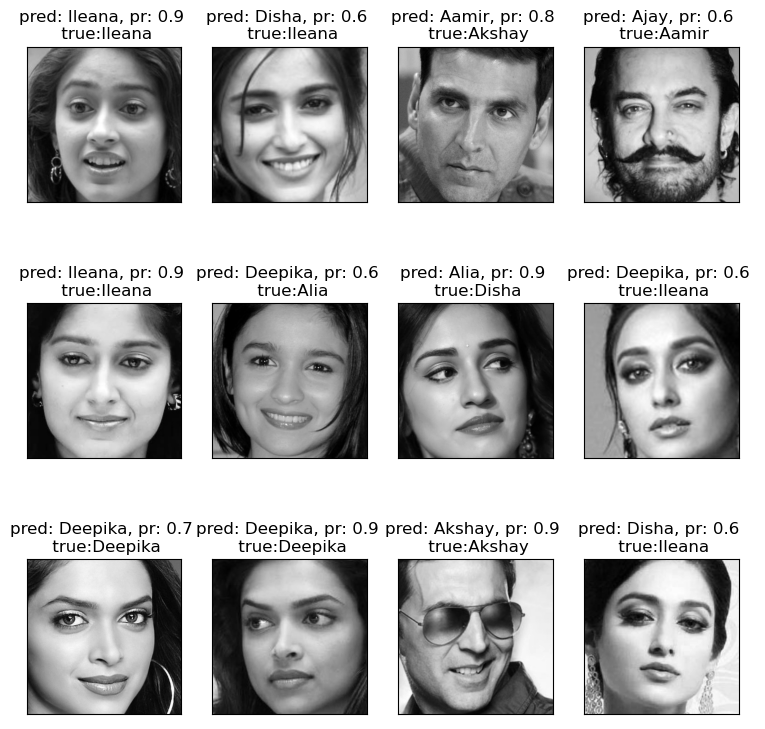

In [ ]:
y_pred=[]; y_prob=[]
for test_face in X_test_lda:
    prob=model.predict_proba([test_face])[0]
    class_id=np.where(prob==np.max(prob))[0][0]

    y_pred.append(class_id)
    y_prob.append(np.max(prob))


y_pred=np.array(y_pred)

prediction_titles=[]
true_positive=0
for i in range (y_pred.shape[0]):
    true_name=class_names[y_test[i]]
    pred_name=class_names[y_pred[i]]

    result=f"pred: {pred_name}, pr: {str(y_prob[i])[0:3]} \n true:{true_name}"

    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive=true_positive+1

print("Accuracy", true_positive*100/y_pred.shape[0])

plot_gallery(X_test, prediction_titles, h,w)
plt.show()

In [ ]:
predictions=model.predict(X_train_lda)
predictions

array([7, 5, 0, 8, 2, 6, 0, 0, 3, 1, 4, 4, 6, 1, 2, 5, 4, 0, 5, 5, 0, 0,
       8, 2, 4, 8, 2, 2, 8, 3, 6, 6, 3, 3, 8, 2, 8, 8, 3, 4, 2, 3, 2, 7,
       3, 8, 3, 1, 3, 4, 1, 8, 7, 7, 2, 5, 5, 7, 6, 5, 6, 8, 7, 6, 0, 2,
       8, 3, 5, 8, 1, 2, 4, 6, 0, 6, 7, 3, 3, 3, 3, 0, 4, 2, 1, 0, 5, 3,
       8, 6, 3, 7, 7, 4, 3, 1, 4, 3, 4, 2, 0, 1, 7, 1, 5, 2, 8, 1, 2, 6,
       6, 4, 1, 5, 1, 0, 0, 2, 2, 3, 4, 3, 1, 4, 5, 5, 6, 6, 7, 8, 2, 2,
       6, 7, 4, 4, 1, 7, 4, 2, 7, 8, 8, 7, 7, 6, 5, 6, 2, 3, 5, 7, 5, 8,
       6, 4, 5, 3, 2, 3, 5, 4, 2, 2, 4, 8, 6, 2, 8, 2, 6, 5, 2, 6, 0, 8,
       1, 5, 1, 4, 3, 3, 0, 0, 0, 3, 2, 7, 8, 4, 1, 1, 4, 6, 6, 3, 0, 7,
       4, 5, 5, 7, 0, 5, 8, 2, 4, 7, 4, 3, 1, 5, 4, 1, 0, 0, 5, 6, 4, 8,
       0, 7, 4, 5, 5, 3, 7, 2, 1, 2, 2, 8, 0, 6, 8, 1, 6, 0, 3, 0, 8, 7,
       4, 5, 7, 6, 4, 4, 4, 5, 8, 5, 8, 8, 6, 7, 5, 4, 3, 0, 4, 3, 6, 5,
       2, 1, 0, 8, 0, 1, 4, 0, 5, 7, 1, 6, 8, 1, 6, 5, 4, 0, 6, 1, 7, 5,
       3, 6, 8, 2, 6, 8, 6, 4, 1, 7, 1, 8, 3, 8, 3,